# 4. KNN Algorithm

In [27]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score

In [28]:
# Read the CSV file 'milk.csv' into a pandas DataFrame 'df'
df = pd.read_csv("Blood_donation.csv")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [29]:
# Rename target column for easier access
df.rename(columns={'whether he/she donated blood in March 2007': 'Donated'}, inplace=True)

In [30]:
# Shows a tuple with row and column size
df.shape

(748, 5)

In [31]:
# Display the first few rows of the DataFrame 'df' to get an overview of the data
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [32]:
# Display summary statistics for the DataFrame 'df' to understand the distribution of the data
df.describe()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [33]:

# Check the data types of each column in the DataFrame 'df' to ensure they are appropriate for analysis
df.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
Donated                  int64
dtype: object

In [34]:
# Display a concise summary of the DataFrame 'df', including the number of non-null entries and the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Donated                748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [35]:
# Check for missing values (NaNs) in each column of the DataFrame 'df' and compute their sum
df.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donated                  0
dtype: int64

## Three Interesting Insights from Dataset

### 1. Recency vs. Donation Rate
Analyze how recent a donor’s last donation affects their likelihood of donating in March 2007.

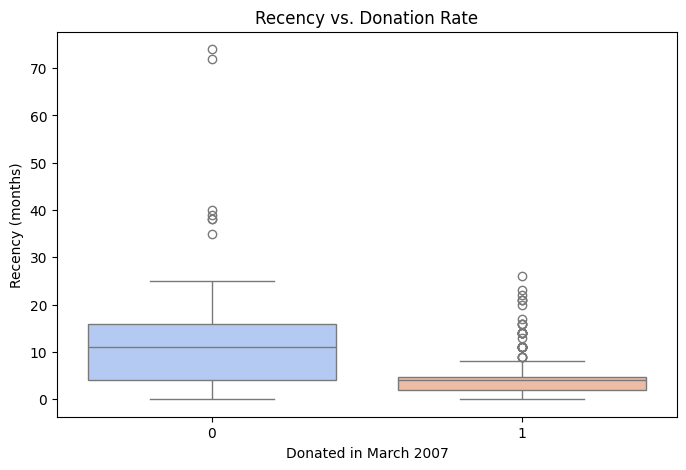

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Donated', y='Recency (months)', hue='Donated', data=df, palette='coolwarm', legend=False)
plt.title('Recency vs. Donation Rate')
plt.xlabel('Donated in March 2007')
plt.ylabel('Recency (months)')
plt.show()


### 2. Frequency of Donations and Donation Rate
Investigate if donors with a higher frequency of donations are more likely to donate again.

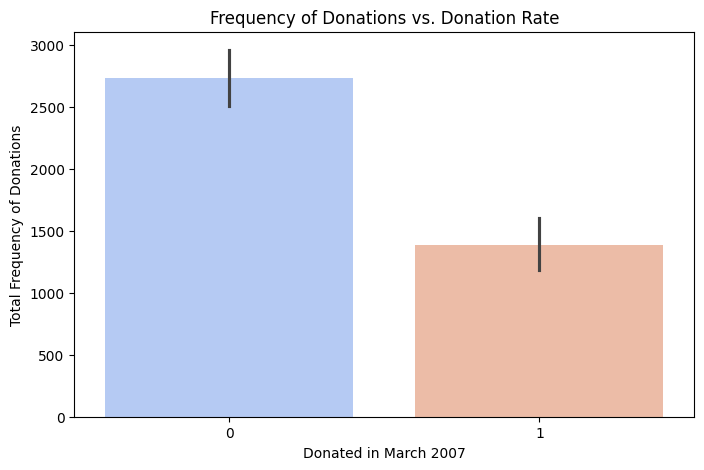

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Donated', y='Frequency (times)', hue='Donated', data=df, palette='coolwarm', estimator=sum, legend=False)
plt.title('Frequency of Donations vs. Donation Rate')
plt.xlabel('Donated in March 2007')
plt.ylabel('Total Frequency of Donations')
plt.show()


### 3. Monetary Contribution and Donation Rate
Determine if the amount of blood donated previously influences future donations

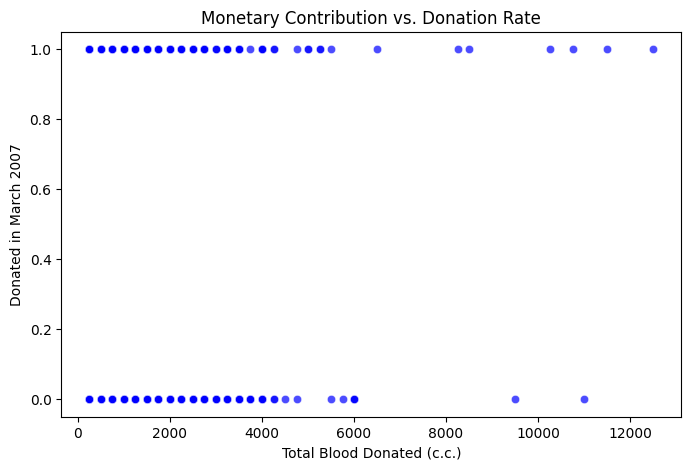

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Monetary (c.c. blood)', y='Donated', data=df, alpha=0.7, color='blue')
plt.title('Monetary Contribution vs. Donation Rate')
plt.xlabel('Total Blood Donated (c.c.)')
plt.ylabel('Donated in March 2007')
plt.show()


In [39]:
# Create a new DataFrame 'x' by dropping the specified column from the original DataFrame 'df'
x = df.drop(columns="Donated")
x


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [40]:
# Create a Series 'y' containing data from the specified column of the original DataFrame 'df'
y = df["Donated"]
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated, Length: 748, dtype: int64

In [41]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
# Standardizing the dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
print("\n Before SMOTE class distribution:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("\n After SMOTE class distribution:")
print(pd.Series(y_train).value_counts())


 Before SMOTE class distribution:
Donated
0    406
1    117
Name: count, dtype: int64

 After SMOTE class distribution:
Donated
1    406
0    406
Name: count, dtype: int64


In [44]:
# Create a KNN classifier object
kn = KNeighborsClassifier()

# Train (fit) the KNN classifier model on the training data
kn.fit(x_train, y_train)



KNeighborsClassifier()

In [45]:
# Use the trained KNN classifier model to predict the target variable for the test data
y_pred = kn.predict(x_test)

In [46]:
# Define a parameter grid to search for the best parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # More values for better selection
    'weights': ['uniform', 'distance'],   # Distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [47]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [48]:
# Train KNN with the best parameters
kn_best = KNeighborsClassifier(**best_params)
kn_best.fit(x_train, y_train)

# Predict using the optimized  KNN model
y_pred_best = kn_best.predict(x_test)

# Evaluate the optimised model
from sklearn.metrics import accuracy_score
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized KNN Accuracy: {accuracy_best:.4f}")


Optimized KNN Accuracy: 0.6667


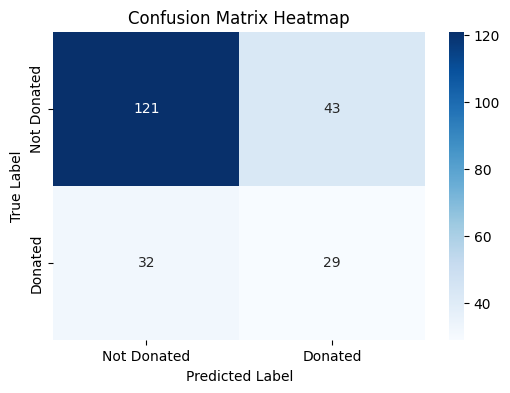

In [49]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Donated", "Donated"], yticklabels=["Not Donated", "Donated"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [50]:
# ROC AUC Score
auc = roc_auc_score(y_test, y_pred_best)
print(f"ROC AUC Score: {auc:.2f}")

ROC AUC Score: 0.61


In [51]:
# Generate a classification report based on the actual and predicted values
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       164
           1       0.40      0.48      0.44        61

    accuracy                           0.67       225
   macro avg       0.60      0.61      0.60       225
weighted avg       0.69      0.67      0.67       225



In [52]:
# Best Cross validation Score
best_score = grid_search.best_score_  
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best Cross-Validation Accuracy: 0.7822
